# Hoja de Trabajo #2
## Deep Learning y Sistemas Inteligentes

### Miembros
- Fernanda Esquivel 21542
- Melissa Pérez 21385

### Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DL-HDT-02)


# Ejercicio 1

En esta actividad, implementará y comparará diferentes funciones de pérdida y técnicas de regularización
utilizando PyTorch. Utilizará el conjunto de datos de Iris para una tarea de clasificación y una arquitectura básica de
red neuronal de feedforward. El objetivo es observar cómo las diferentes opciones impactan la convergencia y el
rendimiento del modelo.

## Task 1

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
#Cargar el conjunto de datos de Iris
iris = load_iris()

#Convertirlo a un DataFrame de pandas para una mejor visualización
dfIris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dfIris['target'] = iris.target

#Mostrar las primeras filas del DataFrame
dfIris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#Definir las características (X) y las etiquetas (y)
X = iris.data
y = iris.target

#Dividir el conjunto de datos en entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Mostrar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)

Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de validación: (30, 4)


## Task 2

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

c:\Users\Usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
class SimpleFeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleFeedForwardNN, self).__init__()
        
        #Definir las capas
        self.fc1 = nn.Linear(input_size, hidden_size1)  #Capa de entrada a primera capa oculta
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  #Primera capa oculta a segunda capa oculta
        self.fc3 = nn.Linear(hidden_size2, output_size)  #Segunda capa oculta a capa de salida

    def forward(self, x):
        #Aplicar la función de activación ReLU en la primera capa
        x = F.relu(self.fc1(x))
        
        #Aplicar la función de activación ReLU en la segunda capa
        x = F.relu(self.fc2(x))
        
        #La capa de salida no suele tener función de activación en problemas de clasificación
        x = self.fc3(x)
        
        return x

In [7]:
inputSize = 4  #4 características para el dataset de Iris
hiddenSize1 = 16  #Número de neuronas en la primera capa oculta
hiddenSize2 = 8  #Número de neuronas en la segunda capa oculta
outputSize = 3  #3 clases en el dataset de Iris

#Instanciar la red neuronal
model = SimpleFeedForwardNN(inputSize, hiddenSize1, hiddenSize2, outputSize)

#Mostrar la estructura del modelo
print(model)

SimpleFeedForwardNN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)


## Task 3

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [10]:
#Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [13]:
#Ajustar la red neuronal
class SimpleFeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleFeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [14]:
def trainAndEvaluate(model, loss_fn, optimizer, X_train, y_train, X_test, y_test, epochs=100, loss_type='cross_entropy'):
    #Listas para registrar las pérdidas
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        #Modo de entrenamiento
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)

        if loss_type == 'cross_entropy':
            loss = loss_fn(outputs, y_train)
        elif loss_type == 'mse':
            y_train_one_hot = F.one_hot(y_train, num_classes=3).float()
            loss = loss_fn(outputs, y_train_one_hot)
        elif loss_type == 'nll':
            outputs = F.log_softmax(outputs, dim=1)
            loss = loss_fn(outputs, y_train)

        loss.backward()
        optimizer.step()

        #Modo de evaluación
        model.eval()
        with torch.no_grad():
            if loss_type == 'cross_entropy':
                train_loss = loss_fn(model(X_train), y_train).item()
                test_loss = loss_fn(model(X_test), y_test).item()
            elif loss_type == 'mse':
                y_train_one_hot = F.one_hot(y_train, num_classes=3).float()
                y_test_one_hot = F.one_hot(y_test, num_classes=3).float()
                train_loss = loss_fn(model(X_train), y_train_one_hot).item()
                test_loss = loss_fn(model(X_test), y_test_one_hot).item()
            elif loss_type == 'nll':
                train_loss = loss_fn(F.log_softmax(model(X_train), dim=1), y_train).item()
                test_loss = loss_fn(F.log_softmax(model(X_test), dim=1), y_test).item()

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    return train_losses, test_losses


In [15]:
#Parámetros del modelo
input_size = 4
hidden_size1 = 16
hidden_size2 = 8
output_size = 3

#Inicializar el modelo
model = SimpleFeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)

#Definir optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_functions = {
    "CrossEntropyLoss": (nn.CrossEntropyLoss(), 'cross_entropy'),
    "MSELoss": (nn.MSELoss(), 'mse'),
    "NLLLoss": (nn.NLLLoss(), 'nll')
}

all_train_losses = {}
all_test_losses = {}

for name, (loss_fn, loss_type) in loss_functions.items():
    print(f"\nEntrenando con {name}")
    model = SimpleFeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)  # Reiniciar el modelo
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reiniciar el optimizador
    train_losses, test_losses = trainAndEvaluate(model, loss_fn, optimizer, X_train, y_train, X_test, y_test, loss_type=loss_type)
    all_train_losses[name] = train_losses
    all_test_losses[name] = test_losses


Entrenando con CrossEntropyLoss
Epoch 10/100, Train Loss: 1.0967, Test Loss: 1.0858
Epoch 20/100, Train Loss: 1.0534, Test Loss: 1.0439
Epoch 30/100, Train Loss: 1.0093, Test Loss: 1.0013
Epoch 40/100, Train Loss: 0.9613, Test Loss: 0.9549
Epoch 50/100, Train Loss: 0.9087, Test Loss: 0.9034
Epoch 60/100, Train Loss: 0.8515, Test Loss: 0.8471
Epoch 70/100, Train Loss: 0.7906, Test Loss: 0.7864
Epoch 80/100, Train Loss: 0.7290, Test Loss: 0.7238
Epoch 90/100, Train Loss: 0.6698, Test Loss: 0.6624
Epoch 100/100, Train Loss: 0.6161, Test Loss: 0.6066

Entrenando con MSELoss
Epoch 10/100, Train Loss: 0.2342, Test Loss: 0.2157
Epoch 20/100, Train Loss: 0.2181, Test Loss: 0.2003
Epoch 30/100, Train Loss: 0.2015, Test Loss: 0.1851
Epoch 40/100, Train Loss: 0.1852, Test Loss: 0.1708
Epoch 50/100, Train Loss: 0.1698, Test Loss: 0.1583
Epoch 60/100, Train Loss: 0.1563, Test Loss: 0.1475
Epoch 70/100, Train Loss: 0.1450, Test Loss: 0.1381
Epoch 80/100, Train Loss: 0.1358, Test Loss: 0.1300
Epoch 

In [16]:
import matplotlib.pyplot as plt

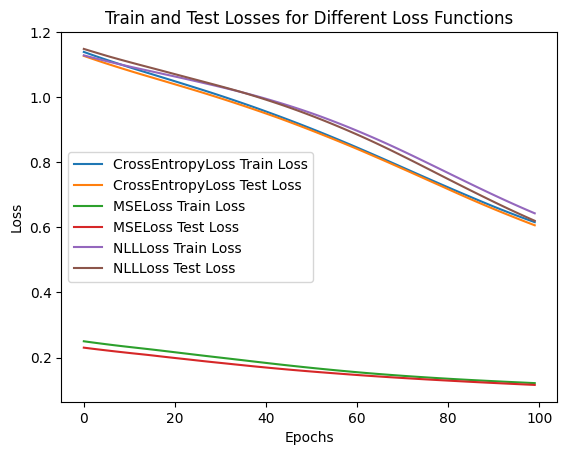

In [17]:
#Visualizar las pérdidas
for name in loss_functions.keys():
    plt.plot(all_train_losses[name], label=f'{name} Train Loss')
    plt.plot(all_test_losses[name], label=f'{name} Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses for Different Loss Functions')
plt.legend()
plt.show()

## Task 4

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

In [4]:
# Modelo
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [5]:
# Entrenar modelo de forma general
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

In [6]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(np.unique(y))
dropout_prob = 0.5
epochs = 100

### Entrenamiento con técnicas de regularización

In [7]:
# L1 Regularization (Lasso)
model_l1 = SimpleNN(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.CrossEntropyLoss()
optimizer_l1 = optim.SGD(model_l1.parameters(), lr=0.01, weight_decay=0)

In [8]:
def l1_regularization(model, l1_lambda):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return l1_lambda * l1_norm

# train para incluir L1
def train_model_l1(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=100, l1_lambda=0.01):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss += l1_regularization(model, l1_lambda)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses

# Entrenar el modelo con L1 regularization
train_losses_l1, val_losses_l1 = train_model_l1(model_l1, criterion, optimizer_l1, X_train, y_train, X_val, y_val, epochs=epochs)

In [9]:
# L2 Regularization (Ridge)
model_l2 = SimpleNN(input_size, hidden_size, output_size, dropout_prob)
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)

# Entrenar el modelo con L2 regularization
train_losses_l2, val_losses_l2 = train_model(model_l2, criterion, optimizer_l2, X_train, y_train, X_val, y_val, epochs=epochs)

In [10]:
# Dropout
model_dropout = SimpleNN(input_size, hidden_size, output_size, dropout_prob)
optimizer_dropout = optim.SGD(model_dropout.parameters(), lr=0.01, weight_decay=0)

# Entrenar el modelo con Dropout
train_losses_dropout, val_losses_dropout = train_model(model_dropout, criterion, optimizer_dropout, X_train, y_train, X_val, y_val, epochs=epochs)

### Entrenamiento sin técnicas de regularización

In [11]:
# Sin regularización
model_no_reg = SimpleNN(input_size, hidden_size, output_size, dropout_prob=0)
optimizer_no_reg = optim.SGD(model_no_reg.parameters(), lr=0.01, weight_decay=0)

# Entrenar el modelo sin regularización
train_losses_no_reg, val_losses_no_reg = train_model(model_no_reg, criterion, optimizer_no_reg, X_train, y_train, X_val, y_val, epochs=epochs)

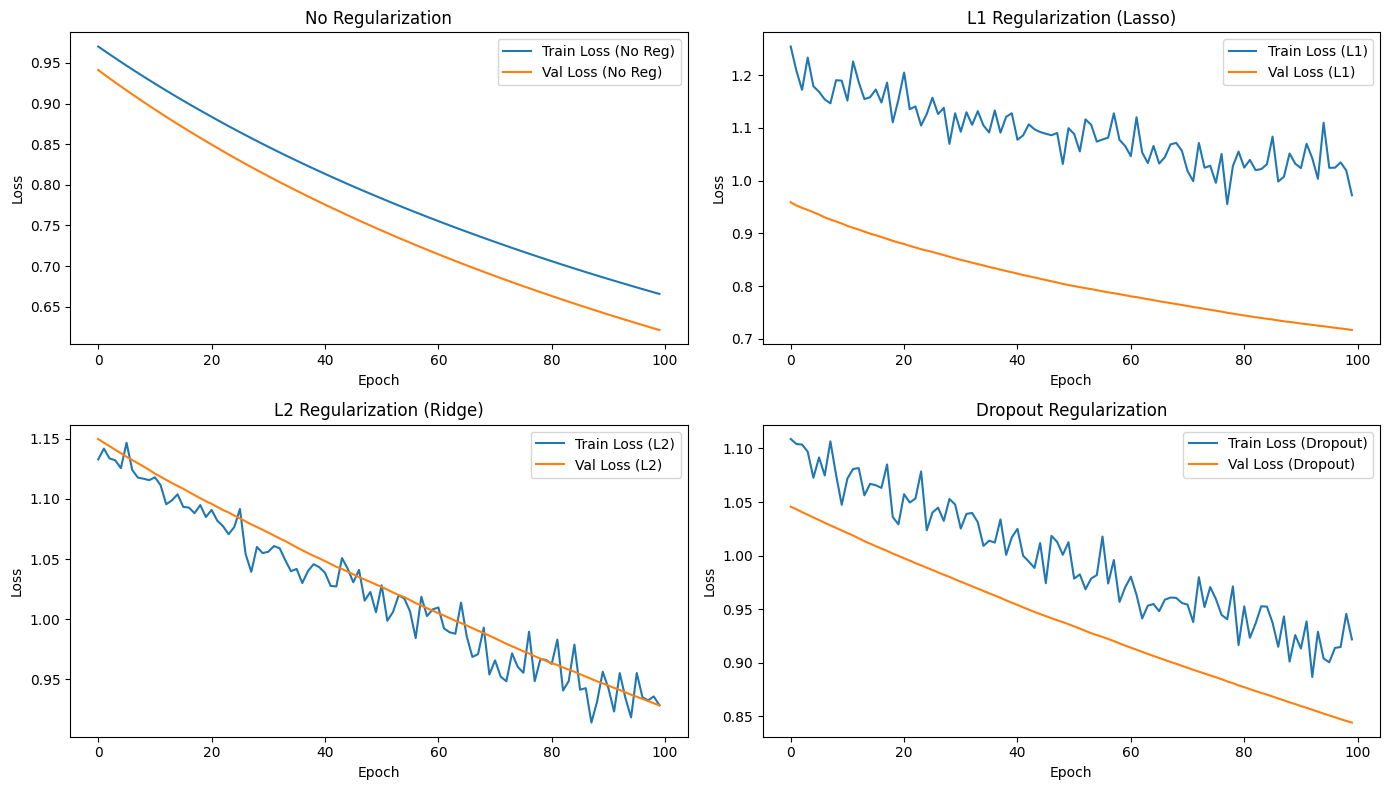

In [12]:
# Graficar las pérdidas de entrenamiento y validación
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(train_losses_no_reg, label='Train Loss (No Reg)')
plt.plot(val_losses_no_reg, label='Val Loss (No Reg)')
plt.title('No Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_losses_l1, label='Train Loss (L1)')
plt.plot(val_losses_l1, label='Val Loss (L1)')
plt.title('L1 Regularization (Lasso)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_losses_l2, label='Train Loss (L2)')
plt.plot(val_losses_l2, label='Val Loss (L2)')
plt.title('L2 Regularization (Ridge)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(train_losses_dropout, label='Train Loss (Dropout)')
plt.plot(val_losses_dropout, label='Val Loss (Dropout)')
plt.title('Dropout Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Análisis de resultados
- Sin Regularización: El modelo puede estar en riesgo de sobreajuste, ya que no hay mecanismos que controlen la complejidad del modelo.
- L1 Regularization: La esparsidad inducida por L1 ayuda a la generalización, pero puede introducir inestabilidad durante el entrenamiento.
- L2 Regularization: Proporciona un aprendizaje más estable y efectivo, equilibrando la reducción de la pérdida con un menor riesgo de sobreajuste.
- Dropout: Añade robustez contra el sobreajuste, a costa de introducir más variabilidad durante el entrenamiento, pero aún así mantiene una buena generalización.

## Task 5

In [16]:
# Usando del task anterior:
#  - Carga del conjunto de datos
#  - División en entrenamiento y validación
#  - Definición del modelo

import time
from torch.utils.data import DataLoader, TensorDataset

# Entrenar el modelo y medir el tiempo de entrenamiento
def train_model_with_time(model, criterion, optimizer, X_train, y_train, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []
    start_time = time.time()
    
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
    
    end_time = time.time()
    training_time = end_time - start_time
    
    return train_losses, val_losses, training_time

In [14]:
# SGD (Stochastic Gradient Descent)
model_sgd = SimpleNN(input_size=X_train.shape[1], hidden_size=10, output_size=len(np.unique(y)), dropout_prob=0.5)
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
train_losses_sgd, val_losses_sgd, time_sgd = train_model_with_time(model_sgd, nn.CrossEntropyLoss(), optimizer_sgd, X_train, y_train, X_val, y_val, epochs=100)

In [15]:
# Batch Gradient Descent
model_batch = SimpleNN(input_size=X_train.shape[1], hidden_size=10, output_size=len(np.unique(y)), dropout_prob=0.5)
optimizer_batch = optim.SGD(model_batch.parameters(), lr=0.01)
train_losses_batch, val_losses_batch, time_batch = train_model_with_time(model_batch, nn.CrossEntropyLoss(), optimizer_batch, X_train, y_train, X_val, y_val, epochs=100)

In [17]:
# Mini-Batch Gradient Descent
batch_size = 16
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [18]:
def train_model_minibatch(model, criterion, optimizer, train_loader, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []
    start_time = time.time()
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
    
    end_time = time.time()
    training_time = end_time - start_time
    
    return train_losses, val_losses, training_time

In [19]:
model_minibatch = SimpleNN(input_size=X_train.shape[1], hidden_size=10, output_size=len(np.unique(y)), dropout_prob=0.5)
optimizer_minibatch = optim.SGD(model_minibatch.parameters(), lr=0.01)
train_losses_minibatch, val_losses_minibatch, time_minibatch = train_model_minibatch(model_minibatch, nn.CrossEntropyLoss(), optimizer_minibatch, train_loader, X_val, y_val, epochs=100)

# Comparar los tiempos de entrenamiento y las pérdidas
(time_sgd, time_batch, time_minibatch)

(0.03480195999145508, 0.03787517547607422, 0.20055127143859863)

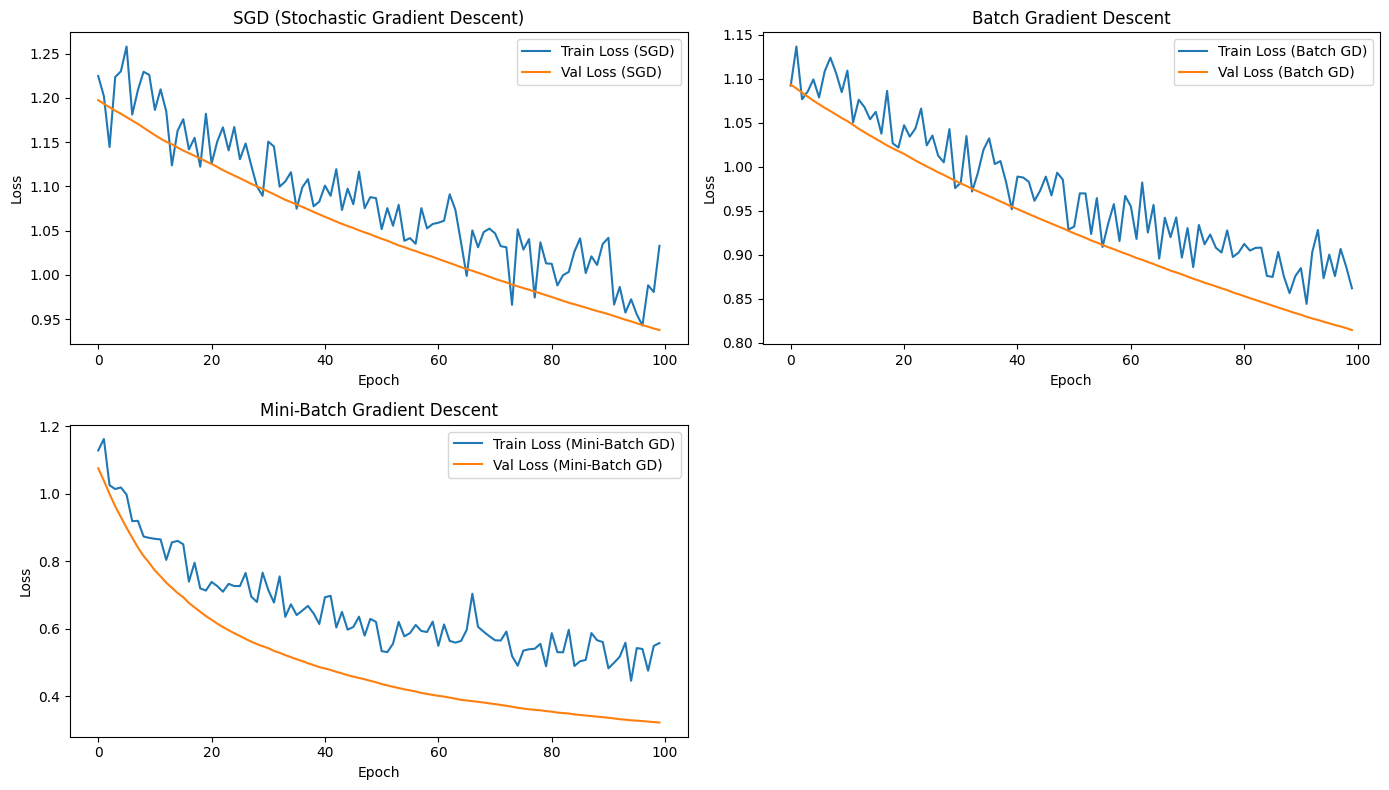

In [20]:
# Gráficas de las pérdidas de entrenamiento y validación para cada técnica de optimización
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(train_losses_sgd, label='Train Loss (SGD)')
plt.plot(val_losses_sgd, label='Val Loss (SGD)')
plt.title('SGD (Stochastic Gradient Descent)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(train_losses_batch, label='Train Loss (Batch GD)')
plt.plot(val_losses_batch, label='Val Loss (Batch GD)')
plt.title('Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_losses_minibatch, label='Train Loss (Mini-Batch GD)')
plt.plot(val_losses_minibatch, label='Val Loss (Mini-Batch GD)')
plt.title('Mini-Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Análisis de resultados
- SDG es el más rápido, pero tiene fluctuaciones en las pérdidas, lo que puede hacer que la convergencia sea menos predecible.
- Batch GD es un poco más lento que SGD, pero tiene una convergencia más estable .
- Mini-Batch GD es el más lento de los tres, tiene más estabilidad y velocidad de convergencia.